#import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/texttest.csv')

In [ ]:
train.shape

(42000, 785)

In [ ]:
test.shape

(24129, 784)

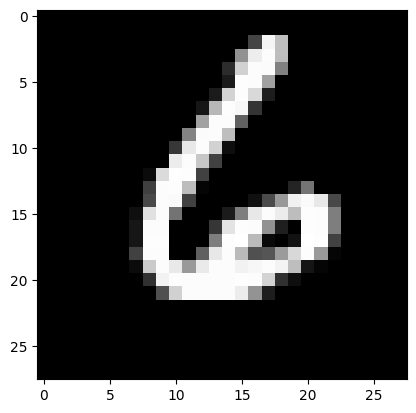

In [ ]:
features = ["pixel{}".format(pixel_num) for pixel_num in range(0,784)]
rows_to_examine = 41998
image_data = np.reshape(train[features][rows_to_examine:rows_to_examine+1].to_numpy(), (28,28))
plt.imshow(image_data, cmap = 'gray')

In [ ]:
x = train.iloc[:,1:]
y = train['label']

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 123)


In [ ]:
xtest.shape

(8400, 784)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
lr=LogisticRegression()
lr.fit(xtrain,ytrain)

preds_ytrain_lr=lr.predict(xtrain)
preds_ytest_lr=lr.predict(xtest)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
def acc_report(actual,predicted):
  acc_score=accuracy_score(actual,predicted)
  cn_matrix=confusion_matrix(actual,predicted)
  cla_report=classification_report(actual,predicted)
  print('accuracy::',acc_score)
  print(cn_matrix)
  print(cla_report)

In [ ]:
acc_report(ytrain,preds_ytrain_lr)
acc_report(ytest,preds_ytest_lr)

accuracy:: 0.94
[[3267    0    9    7    6   19   20    5   10    4]
 [   0 3667    8   14    1    5    3    5   25    7]
 [  12   27 3079   46   28   15   23   34   61   14]
 [   9    9   65 3206    1   80    7   20   72   24]
 [   4   10   14    3 3103    3   23   11   18   87]
 [  26    5   24   87   28 2680   38    9   77   21]
 [  16    4   15    0   14   31 3174    0   12    1]
 [   6    8   30   12   18    4    3 3354    7   99]
 [  16   42   25   71   12   74   14   10 2959   23]
 [  12    9    6   36   65   21    0   89   28 3095]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      3347
           1       0.97      0.98      0.98      3735
           2       0.94      0.92      0.93      3339
           3       0.92      0.92      0.92      3493
           4       0.95      0.95      0.95      3276
           5       0.91      0.89      0.90      2995
           6       0.96      0.97      0.97      3267
           7       0

In [ ]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

preds_ytrain_rf=rf.predict(xtrain)
preds_ytest_rf=rf.predict(xtest)

acc_report(ytrain,preds_ytrain_rf)
acc_report(ytest,preds_ytest_rf)


accuracy:: 1.0
[[3347    0    0    0    0    0    0    0    0    0]
 [   0 3735    0    0    0    0    0    0    0    0]
 [   0    0 3339    0    0    0    0    0    0    0]
 [   0    0    0 3493    0    0    0    0    0    0]
 [   0    0    0    0 3276    0    0    0    0    0]
 [   0    0    0    0    0 2995    0    0    0    0]
 [   0    0    0    0    0    0 3267    0    0    0]
 [   0    0    0    0    0    0    0 3541    0    0]
 [   0    0    0    0    0    0    0    0 3246    0]
 [   0    0    0    0    0    0    0    0    0 3361]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3347
           1       1.00      1.00      1.00      3735
           2       1.00      1.00      1.00      3339
           3       1.00      1.00      1.00      3493
           4       1.00      1.00      1.00      3276
           5       1.00      1.00      1.00      2995
           6       1.00      1.00      1.00      3267
           7       1.

In [ ]:
slp = Perceptron(verbose = 1)
slp.fit(xtrain, ytrain)
preds_slp_train = slp.predict(xtrain)
preds_slp_test = slp.predict(xtest)

-- Epoch 1
Norm: 33680.40, NNZs: 599, Bias: -92.000000, T: 33600, Avg. loss: 46817.951667
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 42819.49, NNZs: 607, Bias: -161.000000, T: 67200, Avg. loss: 41184.869077
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 48607.75, NNZs: 614, Bias: -222.000000, T: 100800, Avg. loss: 36891.702232
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 54442.08, NNZs: 625, Bias: -281.000000, T: 134400, Avg. loss: 35999.461042
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 58608.01, NNZs: 631, Bias: -333.000000, T: 168000, Avg. loss: 37009.589702
Total training time: 0.27 seconds.
-- Epoch 6
Norm: 61946.25, NNZs: 635, Bias: -383.000000, T: 201600, Avg. loss: 34799.316220
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 65207.63, NNZs: 637, Bias: -432.000000, T: 235200, Avg. loss: 36238.479613
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 68995.89, NNZs: 639, Bias: -476.000000, T: 268800, Avg. loss: 34062.205625
Total training time: 0

In [ ]:
acc_report(ytrain, preds_slp_train)
acc_report(ytest, preds_slp_test)

accuracy:: 0.8858333333333334
[[3197    0   14    5    2   31   70    1   25    2]
 [   1 3556   20    9    2    5    4    4  130    4]
 [  18    9 2961   70    9   24   34   16  193    5]
 [  19   10   83 3022    1  142   27   16  152   21]
 [   5    8  123   17 2912   19   38   17  103   34]
 [  27    3   16   78   19 2525   96    7  194   30]
 [  13    5   28    3    5   45 3122    0   46    0]
 [   7    6  134   17    7    7    6 3269   40   48]
 [  18   20   38   53    8   92   17   10 2978   12]
 [  19   15  120   63  188  119    8  298  309 2222]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      3347
           1       0.98      0.95      0.97      3735
           2       0.84      0.89      0.86      3339
           3       0.91      0.87      0.88      3493
           4       0.92      0.89      0.91      3276
           5       0.84      0.84      0.84      2995
           6       0.91      0.96      0.93      3267
      

adaptive learning rate sudden decrease in loss

In [ ]:
mlp=MLPClassifier(hidden_layer_sizes=(128,128,128),verbose=1,max_iter=250)
mlp.fit(xtrain,ytrain)
pred_train_mlp=mlp.predict(xtrain)
pred_test_mlp=mlp.predict(xtest)
acc_report(ytrain,pred_train_mlp)
acc_report(ytest,pred_test_mlp)

Iteration 1, loss = 2.66576781
Iteration 2, loss = 0.49597092
Iteration 3, loss = 0.28262568
Iteration 4, loss = 0.18318051
Iteration 5, loss = 0.12580552
Iteration 6, loss = 0.09535528
Iteration 7, loss = 0.06806630
Iteration 8, loss = 0.07076839
Iteration 9, loss = 0.05066150
Iteration 10, loss = 0.05023159
Iteration 11, loss = 0.06240825
Iteration 12, loss = 0.07743566
Iteration 13, loss = 0.06699209
Iteration 14, loss = 0.06843431
Iteration 15, loss = 0.06710471
Iteration 16, loss = 0.06179461
Iteration 17, loss = 0.05563620
Iteration 18, loss = 0.07464648
Iteration 19, loss = 0.06284454
Iteration 20, loss = 0.04485773
Iteration 21, loss = 0.04251609
Iteration 22, loss = 0.05913887
Iteration 23, loss = 0.06491087
Iteration 24, loss = 0.06824260
Iteration 25, loss = 0.05562377
Iteration 26, loss = 0.05405327
Iteration 27, loss = 0.04546288
Iteration 28, loss = 0.03419169
Iteration 29, loss = 0.03805674
Iteration 30, loss = 0.03624681
Iteration 31, loss = 0.04667298
Iteration 32, los

#Implememtation of TensorFlow

load tensorflow libraries

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import SGD,Adam
from keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

#Declare the model

In [ ]:
model=Sequential()

In [ ]:
model.add(Dense(512,activation='relu',input_dim=784))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)               

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
y_train_ohe=to_categorical(ytrain)
y_test_ohe=to_categorical(ytest)

In [ ]:
y_train_ohe.shape

(33600, 10)

In [ ]:
y_test_ohe.shape

(8400, 10)

In [ ]:
hist=model.fit(xtrain,y_train_ohe,validation_data=(xtest,y_test_ohe),epochs=20,batch_size=64,verbose=2)

Epoch 1/20
525/525 - 15s - loss: 2.8419 - accuracy: 0.8155 - val_loss: 0.2486 - val_accuracy: 0.9287 - 15s/epoch - 29ms/step
Epoch 2/20
525/525 - 15s - loss: 0.3723 - accuracy: 0.9033 - val_loss: 0.1918 - val_accuracy: 0.9457 - 15s/epoch - 28ms/step
Epoch 3/20
525/525 - 14s - loss: 0.2644 - accuracy: 0.9257 - val_loss: 0.1692 - val_accuracy: 0.9515 - 14s/epoch - 26ms/step
Epoch 4/20
525/525 - 16s - loss: 0.2173 - accuracy: 0.9377 - val_loss: 0.1575 - val_accuracy: 0.9540 - 16s/epoch - 31ms/step
Epoch 5/20
525/525 - 13s - loss: 0.1911 - accuracy: 0.9452 - val_loss: 0.1613 - val_accuracy: 0.9593 - 13s/epoch - 25ms/step
Epoch 6/20
525/525 - 14s - loss: 0.1805 - accuracy: 0.9492 - val_loss: 0.1569 - val_accuracy: 0.9612 - 14s/epoch - 26ms/step
Epoch 7/20
525/525 - 12s - loss: 0.1810 - accuracy: 0.9499 - val_loss: 0.1543 - val_accuracy: 0.9587 - 12s/epoch - 23ms/step
Epoch 8/20
525/525 - 13s - loss: 0.1795 - accuracy: 0.9515 - val_loss: 0.1430 - val_accuracy: 0.9648 - 13s/epoch - 24ms/step


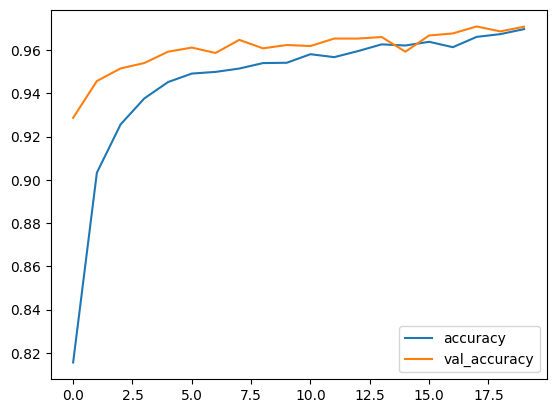

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

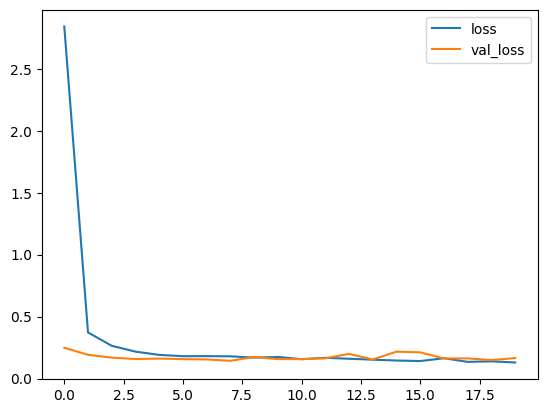

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [ ]:
preds_y_train = model.predict(xtrain)

1050/1050 [==============================] - 6s 5ms/step


In [ ]:
preds_y_train[1]

array([2.3362063e-16, 5.7804845e-18, 2.7844014e-20, 1.9688253e-09,
       7.8164902e-07, 1.3406684e-11, 1.7052432e-26, 1.4100281e-08,
       1.1733826e-10, 9.9999911e-01], dtype=float32)

In [ ]:
np.argmax(preds_y_train[1], axis = 0)

9

In [ ]:
preds_y_train_class = np.argmax(preds_y_train, axis = 1)

In [ ]:
acc_report(ytrain, preds_y_train_class)

accuracy:: 0.99
[[3338    0    0    0    0    1    3    0    4    1]
 [   0 3712    0    1    4    0    1   10    7    0]
 [   4    1 3322    0    0    1    0    8    1    2]
 [   2    2   12 3435    0   17    0    6   12    7]
 [   3    2    1    0 3255    0    3    2    1    9]
 [   2    0    0    8    0 2975    1    1    5    3]
 [  13    0    2    0    2   15 3229    0    5    1]
 [   0    4    4    0    2    1    0 3523    1    6]
 [   3    4    4    5    8   11    3    3 3187   18]
 [   7    1    1    3   27   14    0   16    4 3288]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3347
           1       1.00      0.99      1.00      3735
           2       0.99      0.99      0.99      3339
           3       1.00      0.98      0.99      3493
           4       0.99      0.99      0.99      3276
           5       0.98      0.99      0.99      2995
           6       1.00      0.99      0.99      3267
           7       0

In [ ]:
preds_ytest_class = np.argmax(model.predict(xtest), axis = 1)

263/263 [==============================] - 2s 6ms/step


In [ ]:
acc_report(ytest, preds_ytest_class)

accuracy:: 0.9708333333333333
[[776   0   2   0   0   2   0   0   5   0]
 [  0 932   4   1   2   1   1   2   5   1]
 [  5   2 818   1   1   0   0   3   7   1]
 [  1   0   9 829   0   5   0   7   3   4]
 [  0   2   0   0 778   0   2   1   3  10]
 [  2   1   3  11   1 775   2   0   3   2]
 [  6   1   0   0   1   8 854   0   0   0]
 [  0   2  10   1   5   1   0 834   0   7]
 [  4   4   2   2   4   4   3   2 785   7]
 [  5   0   1   3  18   9   0  14   3 774]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       785
           1       0.99      0.98      0.98       949
           2       0.96      0.98      0.97       838
           3       0.98      0.97      0.97       858
           4       0.96      0.98      0.97       796
           5       0.96      0.97      0.97       800
           6       0.99      0.98      0.99       870
           7       0.97      0.97      0.97       860
           8       0.96      0.96      0.96       81